# To compare the performance of Stochastic Gradient Descent (SGD) and the Batch method 

1.Convergence Rate: How quickly the error reduces over epochs.
2.Final Error: The error after a fixed number of epochs.
Batch Method:
In the batch method, weight updates are computed using the average gradient over all the training examples, and the weights are updated once per epoch.

Stochastic Gradient Descent (SGD) Method:
In SGD, weight updates are made for each training example individually. This often leads to faster, but noisier convergence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def activation(x):
    return np.where(x >= 0, 1, 0)  # Binary step function


In [2]:
def delta_rule_sgd(X, T, epochs=100, lr=0.1):
    W = np.random.randn(X.shape[1])  # Initialize weights
    error_list = []
    
    for epoch in range(epochs):
        total_error = 0
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)  # Shuffle data for each epoch (SGD)
        
        for i in indices:
            x_i = X[i]
            t_i = T[i]
            net_input = np.dot(x_i, W)
            y_i = activation(net_input)
            error = t_i - y_i
            W += lr * error * x_i  # Delta rule update
            total_error += error**2
        
        error_list.append(total_error)
    
    return W, error_list


In [3]:
# Step 3: Delta rule with Batch method

In [4]:
def delta_rule_batch(X, T, epochs=100, lr=0.1):
    W = np.random.randn(X.shape[1])  # Initialize weights
    error_list = []
    
    for epoch in range(epochs):
        total_error = 0
        weight_update = np.zeros(W.shape)  # Accumulate weight updates
        
        for i in range(X.shape[0]):
            x_i = X[i]
            t_i = T[i]
            net_input = np.dot(x_i, W)
            y_i = activation(net_input)
            error = t_i - y_i
            weight_update += lr * error * x_i  # Accumulate weight updates
            total_error += error**2
        
        W += weight_update / X.shape[0]  # Apply average update after each epoch (batch)
        error_list.append(total_error)
    
    return W, error_list


In [5]:
# Input data (including bias term as third column)
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

# Target output
T = np.array([0, 0, 1, 1])


In [6]:
# Train using SGD
epochs = 100
learning_rate = 0.1
W_sgd, error_list_sgd = delta_rule_sgd(X, T, epochs=epochs, lr=learning_rate)

# Train using Batch
W_batch, error_list_batch = delta_rule_batch(X, T, epochs=epochs, lr=learning_rate)


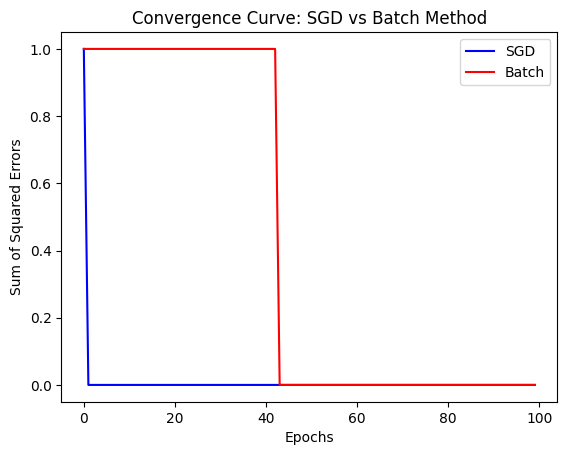

In [7]:
# Plot the convergence curve for SGD and Batch
plt(figsize(5,5))
plt.plot(range(epochs), error_list_sgd, label='SGD', color='blue')
plt.plot(range(epochs), error_list_batch, label='Batch', color='red')
plt.title('Convergence Curve: SGD vs Batch Method')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.legend()
plt.show()


In [8]:
# Test the final predictions of both models
predictions_sgd = activation(np.dot(X, W_sgd))
predictions_batch = activation(np.dot(X, W_batch))

print("Predictions (SGD):", predictions_sgd)
print("Predictions (Batch):", predictions_batch)
print("True Targets:", T)


Predictions (SGD): [0 0 1 1]
Predictions (Batch): [0 0 1 1]
True Targets: [0 0 1 1]
